In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch

import bars
import c
import d
import labels
import signals
import u

In [2]:
all_data = d.fetch_all("data/daily", index_col="Date", parse_dates=["Date"])
data = pd.concat(
    [df["Close/Last"].rename(ticker) for ticker, df in all_data.items()], axis=1
)
data.sort_index(inplace=True)
data.dropna(inplace=True)
data.head()

,BND,DIA,EEM,GDX,GLD,IEV,INDY,LQD,MCHI,QQQ,SLV,SPX,TLT,UNG,USO,WEAT
Date,,,,,,,,,,,,,,,,
2012-05-29,84.03,125.60,38.20,44.09,151.02,32.94,20.39,116.05,40.766,62.860,27.10,1332.42,123.02,69.48,273.84,20.2770
2012-05-30,84.35,123.99,37.54,44.24,151.91,32.09,19.99,116.15,40.310,62.330,27.12,1313.32,126.14,67.64,264.16,19.9500
2012-05-31,84.51,123.70,37.70,43.78,151.62,32.13,20.00,116.97,40.600,62.060,26.96,1310.33,127.60,67.16,260.88,20.0474
2012-06-01,84.62,121.01,36.69,46.58,157.50,31.45,19.72,117.29,39.670,60.409,27.62,1278.04,130.36,64.72,251.44,19.5700
2012-06-04,84.41,120.78,36.85,47.33,157.32,31.67,19.97,116.40,39.470,60.870,27.46,1278.18,129.33,67.52,254.08,19.8299


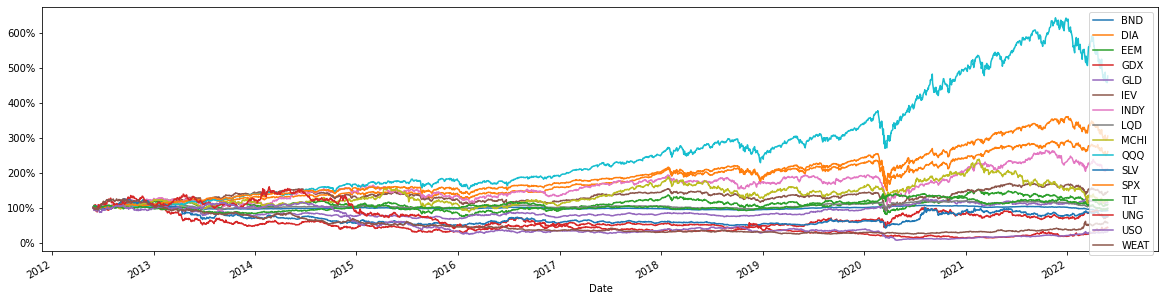

In [3]:
import matplotlib.ticker as mtick

plt.rcParams["figure.figsize"] = (20, 5)

normalized = data.divide(data.iloc[0])
ax = normalized.plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend()

In [4]:
returns = np.log(data / data.shift(1))
returns.dropna(inplace=True)
returns.head()

,BND,DIA,EEM,GDX,GLD,IEV,INDY,LQD,MCHI,QQQ,SLV,SPX,TLT,UNG,USO,WEAT
Date,,,,,,,,,,,,,,,,
2012-05-30,0.003801,-0.012901,-0.017428,0.003396,0.005876,-0.026143,-0.019812,0.000861,-0.011249,-0.008467,0.000738,-0.014439,0.025045,-0.026839,-0.035989,-0.016258
2012-05-31,0.001895,-0.002342,0.004253,-0.010452,-0.001911,0.001246,0.000500,0.007035,0.007168,-0.004341,-0.005917,-0.002279,0.011508,-0.007122,-0.012494,0.004870
2012-06-01,0.001301,-0.021986,-0.027156,0.061994,0.038048,-0.021391,-0.014099,0.002732,-0.023173,-0.026964,0.024186,-0.024951,0.021399,-0.037008,-0.036856,-0.024102
2012-06-04,-0.002485,-0.001902,0.004351,0.015973,-0.001144,0.006971,0.012598,-0.007617,-0.005054,0.007602,-0.005810,0.000110,-0.007933,0.042354,0.010445,0.013193
2012-06-05,-0.002016,0.002530,0.002575,0.004217,-0.001145,0.003153,0.002501,-0.002150,0.000507,0.004099,0.009424,0.005711,-0.013467,0.002367,0.000000,-0.035881


In [5]:
corr = returns.corr()
corr

,BND,DIA,EEM,GDX,GLD,IEV,INDY,LQD,MCHI,QQQ,SLV,SPX,TLT,UNG,USO,WEAT
BND,1.000000,-0.004749,0.047445,0.240223,0.290437,0.008660,0.058423,0.834176,-0.009816,0.011731,0.171150,0.002698,0.731152,-0.011558,-0.038422,-0.004869
DIA,-0.004749,1.000000,0.739808,0.112385,-0.015630,0.821810,0.612422,0.160642,0.565726,0.833444,0.164169,0.965368,-0.375062,0.059576,0.359359,0.032228
EEM,0.047445,0.739808,1.000000,0.244192,0.119876,0.796988,0.744947,0.176831,0.870368,0.728386,0.280996,0.770958,-0.251620,0.058972,0.359690,0.020092
GDX,0.240223,0.112385,0.244192,1.000000,0.756911,0.199635,0.185350,0.237098,0.149127,0.115346,0.666205,0.132161,0.186815,0.023950,0.175141,0.082297
GLD,0.290437,-0.015630,0.119876,0.756911,1.000000,0.069572,0.073668,0.273024,0.050436,0.008553,0.801753,0.004132,0.256122,0.007764,0.088187,0.096041
IEV,0.008660,0.821810,0.796988,0.199635,0.069572,1.000000,0.658809,0.162758,0.619426,0.724025,0.245613,0.828541,-0.338339,0.056491,0.355308,0.018445
INDY,0.058423,0.612422,0.744947,0.185350,0.073668,0.658809,1.000000,0.157648,0.553094,0.552583,0.196951,0.628032,-0.200795,0.032737,0.228562,0.003247
LQD,0.834176,0.160642,0.176831,0.237098,0.273024,0.162758,0.157648,1.000000,0.104928,0.160772,0.211763,0.167813,0.613926,-0.012813,0.022119,-0.002918
MCHI,-0.009816,0.565726,0.870368,0.149127,0.050436,0.619426,0.553094,0.104928,1.000000,0.639019,0.190401,0.615672,-0.218661,0.053022,0.252234,-0.005746
QQQ,0.011731,0.833444,0.728386,0.115346,0.008553,0.724025,0.552583,0.160772,0.639019,1.000000,0.164258,0.922667,-0.282590,0.045348,0.264524,0.004220


In [6]:
cov = returns.cov()
cov

,BND,DIA,EEM,GDX,GLD,IEV,INDY,LQD,MCHI,QQQ,SLV,SPX,TLT,UNG,USO,WEAT
BND,8.041690e-06,-1.444510e-07,0.000002,0.000017,7.792234e-06,2.893418e-07,2.426336e-06,1.127140e-05,-4.396648e-07,4.230155e-07,0.000008,8.179217e-08,0.000018,-9.169061e-07,-0.000003,-2.255830e-07
DIA,-1.444510e-07,1.150498e-04,0.000105,0.000030,-1.586174e-06,1.038524e-04,9.620217e-05,8.210126e-06,9.584391e-05,1.136772e-04,0.000029,1.106923e-04,-0.000035,1.787566e-05,0.000094,5.647881e-06
EEM,1.773258e-06,1.045852e-04,0.000174,0.000081,1.494784e-05,1.237546e-04,1.437887e-04,1.110487e-05,1.811867e-04,1.220741e-04,0.000061,1.086225e-04,-0.000029,2.174235e-05,0.000115,4.326490e-06
GDX,1.705627e-05,3.018193e-05,0.000081,0.000627,1.792994e-04,5.888916e-05,6.796442e-05,2.828595e-05,5.897494e-05,3.672416e-05,0.000276,3.537381e-05,0.000041,1.677435e-05,0.000106,3.366590e-05
GLD,7.792234e-06,-1.586174e-06,0.000015,0.000179,8.951050e-05,7.754897e-06,1.020714e-05,1.230793e-05,7.536897e-06,1.028951e-06,0.000125,4.179354e-07,0.000021,2.054812e-06,0.000020,1.484592e-05
IEV,2.893418e-07,1.038524e-04,0.000124,0.000059,7.754897e-06,1.388046e-04,1.136719e-04,9.136727e-06,1.152676e-04,1.084699e-04,0.000048,1.043512e-04,-0.000035,1.861780e-05,0.000102,3.550601e-06
INDY,2.426336e-06,9.620217e-05,0.000144,0.000068,1.020714e-05,1.136719e-04,2.144778e-04,1.100086e-05,1.279399e-04,1.029064e-04,0.000048,9.832288e-05,-0.000026,1.341175e-05,0.000081,7.768751e-07
LQD,1.127140e-05,8.210126e-06,0.000011,0.000028,1.230793e-05,9.136727e-06,1.100086e-05,2.270354e-05,7.896822e-06,9.741160e-06,0.000017,8.547808e-06,0.000026,-1.707869e-06,0.000003,-2.271684e-07
MCHI,-4.396648e-07,9.584391e-05,0.000181,0.000059,7.536897e-06,1.152676e-04,1.279399e-04,7.896822e-06,2.494775e-04,1.283462e-04,0.000050,1.039552e-04,-0.000030,2.342719e-05,0.000097,-1.482904e-06
QQQ,4.230155e-07,1.136772e-04,0.000122,0.000037,1.028951e-06,1.084699e-04,1.029064e-04,9.741160e-06,1.283462e-04,1.616992e-04,0.000035,1.254239e-04,-0.000032,1.613111e-05,0.000082,8.768379e-07


In [7]:
dist = ((1 - corr) / 2.0) ** 0.5
dist

,BND,DIA,EEM,GDX,GLD,IEV,INDY,LQD,MCHI,QQQ,SLV,SPX,TLT,UNG,USO,WEAT
BND,0.000000,0.708784,0.690129,0.616351,0.595636,0.704038,0.686140,0.287945,0.710569,0.702947,0.643758,0.706152,0.366639,0.711182,0.720563,0.708826
DIA,0.708784,0.000000,0.360688,0.666189,0.712612,0.298487,0.440215,0.647826,0.465980,0.288579,0.646464,0.131590,0.829175,0.685720,0.565969,0.695619
EEM,0.690129,0.360688,0.000000,0.614739,0.663372,0.318600,0.357108,0.641548,0.254590,0.368520,0.599585,0.338410,0.791082,0.685940,0.565822,0.699967
GDX,0.616351,0.666189,0.614739,0.000000,0.348632,0.632600,0.638220,0.617617,0.652255,0.665077,0.408531,0.658726,0.637646,0.698588,0.642207,0.677386
GLD,0.595636,0.712612,0.663372,0.348632,0.000000,0.682066,0.680563,0.602900,0.689044,0.704076,0.314839,0.705644,0.609868,0.704356,0.675209,0.672294
IEV,0.704038,0.298487,0.318600,0.632600,0.682066,0.000000,0.413032,0.647009,0.436219,0.371467,0.614161,0.292796,0.818028,0.686844,0.567755,0.700555
INDY,0.686140,0.440215,0.357108,0.638220,0.680563,0.413032,0.000000,0.648981,0.472708,0.472979,0.633660,0.431258,0.774853,0.695436,0.621063,0.705958
LQD,0.287945,0.647826,0.641548,0.617617,0.602900,0.647009,0.648981,0.000000,0.668981,0.647776,0.627789,0.645053,0.439360,0.711623,0.699243,0.708138
MCHI,0.710569,0.465980,0.254590,0.652255,0.689044,0.436219,0.472708,0.668981,0.000000,0.424842,0.636238,0.438365,0.780596,0.688105,0.611460,0.709135
QQQ,0.702947,0.288579,0.368520,0.665077,0.704076,0.371467,0.472979,0.647776,0.424842,0.000000,0.646429,0.196638,0.800809,0.690888,0.606414,0.705613


In [8]:
from scipy.spatial.distance import squareform

squareform_dist = squareform(dist)
link = sch.linkage(squareform_dist, "single")  # linkage matrix
link

array([[ 1.        , 11.        ,  0.13158981,  2.        ],
       [ 9.        , 16.        ,  0.19663757,  3.        ],
       [ 2.        ,  8.        ,  0.25459025,  2.        ],
       [ 0.        ,  7.        ,  0.28794485,  2.        ],
       [ 5.        , 17.        ,  0.29279562,  4.        ],
       [ 4.        , 10.        ,  0.31483917,  2.        ],
       [18.        , 20.        ,  0.31860027,  6.        ],
       [ 3.        , 21.        ,  0.34863215,  3.        ],
       [ 6.        , 22.        ,  0.35710825,  7.        ],
       [12.        , 19.        ,  0.36663906,  3.        ],
       [14.        , 24.        ,  0.56582242,  8.        ],
       [23.        , 25.        ,  0.59563555,  6.        ],
       [26.        , 27.        ,  0.59958487, 14.        ],
       [13.        , 28.        ,  0.66553997, 15.        ],
       [15.        , 29.        ,  0.66554396, 16.        ]])

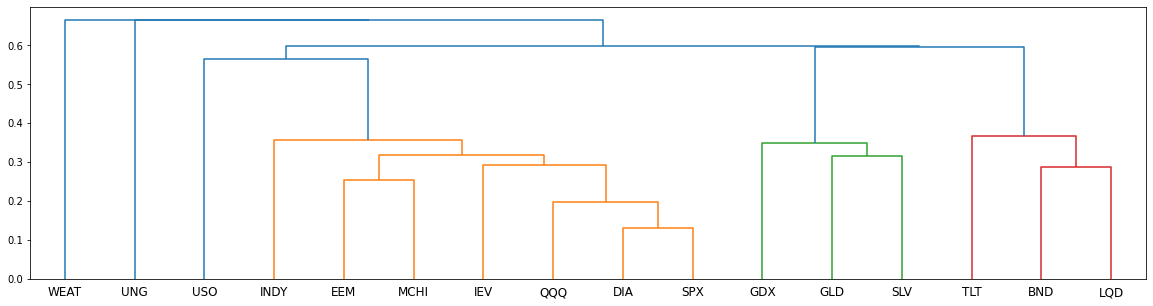

In [9]:
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(link, labels=dist.index)

In [10]:
from scipy.cluster.hierarchy import leaves_list

leaves = leaves_list(link)
quasi_diagonal = [corr.index[l] for l in leaves]
quasi_diagonal

['WEAT',
 'UNG',
 'USO',
 'INDY',
 'EEM',
 'MCHI',
 'IEV',
 'QQQ',
 'DIA',
 'SPX',
 'GDX',
 'GLD',
 'SLV',
 'TLT',
 'BND',
 'LQD']

<AxesSubplot:>

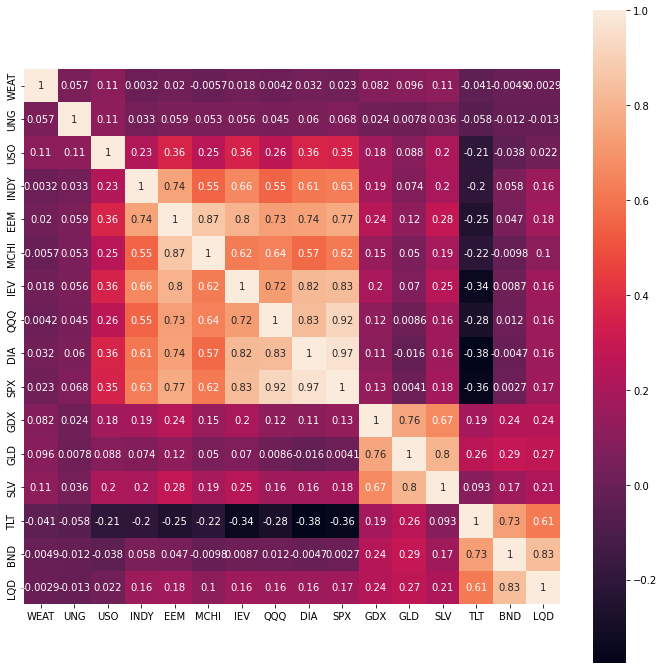

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 12))
corr_quasi_diagonal = corr.reindex(quasi_diagonal)[quasi_diagonal]
sns.heatmap(corr_quasi_diagonal, annot=True, square=True)

In [16]:
def get_allocations(link, covariance_matrix, labels=None):
    def variance(allocations):
        return np.dot(np.matmul(covariance_matrix, allocations), allocations)

    num_instruments = len(covariance_matrix)
    allocations = []
    for i in range(num_instruments):
        a = np.zeros(num_instruments)
        a[i] = 1
        allocations.append(a)

    for i, l in enumerate(link):
        left_cluster, right_cluster, _, _ = l.astype(int)
        left_cluster_variance = variance(allocations[left_cluster])
        right_cluster_variance = variance(allocations[right_cluster])
        left_cluster_weight = right_cluster_variance / (
            left_cluster_variance + right_cluster_variance
        )
        allocations.append(
            left_cluster_weight * allocations[left_cluster]
            + (1 - left_cluster_weight) * allocations[right_cluster]
        )

    allocations = pd.Series(allocations[-1])
    if labels is not None:
        allocations.set_axis(labels, inplace=True)

    return allocations


allocs = get_allocations(link, cov.to_numpy(), cov.index)
allocs

0.00011504984435875856
0.00016169920880342657
0.00017370640319471444
8.041689652724214e-06
0.00013880457370700082
8.951050411414596e-05
0.00019009329688049681
0.0006268933105217359
0.00021447783432314621
7.751313433272757e-05
0.0005887073536918574
0.0007825320798048178
0.00013823999554344978
0.00014936620805360836
1.3269749611351176e-05


BND     0.544779
DIA     0.002999
EEM     0.007104
GDX     0.009516
GLD     0.039402
IEV     0.009143
INDY    0.018723
LQD     0.192963
MCHI    0.004947
QQQ     0.004194
SLV     0.012914
SPX     0.003019
TLT     0.097959
UNG     0.010380
USO     0.011529
WEAT    0.030429
dtype: float64

In [51]:

def get_cov(alpha, a, b, cov):
    alloc = alpha * a + (1-alpha) * b
    return np.dot(np.matmul(cov, alloc), alloc)

def get_allocations2(link, covariance_matrix, labels=None):
    def optimal_split(a, b):
        tmp = np.matmul(covariance_matrix, a-b)
        return -np.dot(b, tmp) / np.dot(a-b, tmp)

    def variance(allocations):
        return np.dot(np.matmul(covariance_matrix, allocations), allocations)

    num_instruments = len(covariance_matrix)
    allocations = []
    for i in range(num_instruments):
        a = np.zeros(num_instruments)
        a[i] = 1
        allocations.append(a)
    for i, l in enumerate(link):
        left_cluster, right_cluster, _, _ = l.astype(int)
        alpha = optimal_split(allocations[left_cluster], allocations[right_cluster])
        allocations.append(
            alpha * allocations[left_cluster]
            + (1 - alpha) * allocations[right_cluster]
        )
    allocations = pd.Series(allocations[-1])
    if labels is not None:
        allocations.set_axis(labels, inplace=True)
    return allocations
allocs2 = get_allocations2(link, cov.to_numpy(), cov.index)
allocs2

BND     1.450657
DIA     0.012708
EEM     0.000667
GDX    -0.009318
GLD     0.083605
IEV     0.005090
INDY    0.002346
LQD    -0.409827
MCHI   -0.000073
QQQ    -0.005052
SLV    -0.020283
SPX     0.015443
TLT    -0.142734
UNG     0.003843
USO     0.000867
WEAT    0.012062
dtype: float64

In [26]:
# On 20151227 by MLdP <lopezdeprado@lbl.gov>
# Hierarchical Risk Parity
import matplotlib.pyplot as mpl
import scipy.cluster.hierarchy as sch,random,numpy as np,pandas as pd
#------------------------------------------------------------------------------

def getIVP(cov,**kargs):
    # Compute the inverse-variance portfolio
    ivp=1./np.diag(cov)
    ivp/=ivp.sum()
    return ivp
#------------------------------------------------------------------------------
def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar
#------------------------------------------------------------------------------
def getQuasiDiag(link):
    # Sort clustered items by distance
    link=link.astype(int)
    sortIx=pd.Series([link[-1,0],link[-1,1]])
    numItems=link[-1,3] # number of original items
    while sortIx.max()>=numItems:
        sortIx.index=range(0,sortIx.shape[0]*2,2) # make space
        df0=sortIx[sortIx>=numItems] # find clusters
        i=df0.index;j=df0.values-numItems
        sortIx[i]=link[j,0] # item 1
        df0=pd.Series(link[j,1],index=i+1)
        sortIx=sortIx.append(df0) # item 2
        sortIx=sortIx.sort_index() # re-sort
        sortIx.index=range(sortIx.shape[0]) # re-index
    return sortIx.tolist()
#------------------------------------------------------------------------------
def getRecBipart(cov,sortIx):
    # Compute HRP alloc
    w=pd.Series(1,index=sortIx)
    cItems=[sortIx] # initialize all items in one cluster
    while len(cItems)>0:
        cItems=[i[j:k] for i in cItems for j,k in ((0,int(len(i)/2)), \
            (int(len(i)/2),len(i))) if len(i)>1] # bi-section
        for i in range(0,len(cItems),2): # parse in pairs
            cItems0=cItems[i] # cluster 1
            cItems1=cItems[i+1] # cluster 2
            cVar0=getClusterVar(cov,cItems0)
            cVar1=getClusterVar(cov,cItems1)
            alpha=1-cVar0/(cVar0+cVar1)
            w[cItems0]*=alpha # weight 1
            w[cItems1]*=1-alpha # weight 2
    return w
#------------------------------------------------------------------------------
def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist=((1-corr)/2.)**.5 # distance matrix
    return dist
#------------------------------------------------------------------------------
def plotCorrMatrix(path,corr,labels=None):
    # Heatmap of the correlation matrix
    if labels is None:labels=[]
    mpl.pcolor(corr)
    mpl.colorbar()
    mpl.yticks(np.arange(.5,corr.shape[0]+.5),labels)
    mpl.xticks(np.arange(.5,corr.shape[0]+.5),labels)
    mpl.savefig(path)
    mpl.clf();mpl.close() # reset pylab
    return
#------------------------------------------------------------------------------
def generateData(nObs,size0,size1,sigma1):
    # Time series of correlated variables
    #1) generating some uncorrelated data
    np.random.seed(seed=12345);random.seed(12345)
    x=np.random.normal(0,1,size=(nObs,size0)) # each row is a variable
    #2) creating correlation between the variables
    cols=[random.randint(0,size0-1) for i in range(size1)]
    y=x[:,cols]+np.random.normal(0,sigma1,size=(nObs,len(cols)))
    x=np.append(x,y,axis=1)
    x=pd.DataFrame(x,columns=range(1,x.shape[1]+1))
    return x,cols
#------------------------------------------------------------------------------

In [66]:
#3) cluster
dist=correlDist(corr)
link=sch.linkage(dist,'single')
sortIx=getQuasiDiag(link)
sortIx=corr.index[sortIx].tolist() # recover labels
df0=corr.loc[sortIx,sortIx] # reorder
#plotCorrMatrix('HRP3_corr1.png',df0,labels=df0.columns)
#4) Capital allocation
hrp=getRecBipart(cov,quasi_diagonal)
print(hrp[quasi_diagonal])

WEAT    0.019909
UNG     0.006792
USO     0.007879
INDY    0.021628
EEM     0.010573
MCHI    0.007362
IEV     0.014265
QQQ     0.012245
DIA     0.037950
SPX     0.038207
GDX     0.009122
GLD     0.063888
SLV     0.022659
TLT     0.079836
BND     0.478277
LQD     0.169408
dtype: float64


C:\Users\maxga\AppData\Local\Temp\ipykernel_34560\2868985776.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link=sch.linkage(dist,'single')
C:\Users\maxga\AppData\Local\Temp\ipykernel_34560\4234854251.py:31: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortIx=sortIx.append(df0) # item 2
C:\Users\maxga\AppData\Local\Temp\ipykernel_34560\4234854251.py:31: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortIx=sortIx.append(df0) # item 2
C:\Users\maxga\AppData\Local\Temp\ipykernel_34560\4234854251.py:31: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortIx=sortIx.append(df0) # item 2
C:\Users\maxga\AppData\Local\Temp\ipykernel

In [64]:
import portfolio

cov_quasi_diagonal = cov.reindex(quasi_diagonal)[quasi_diagonal]
portfolio.hrp_allocation(cov_quasi_diagonal)

WEAT    0.019909
UNG     0.006792
USO     0.007879
INDY    0.021628
EEM     0.010573
MCHI    0.007362
IEV     0.014265
QQQ     0.012245
DIA     0.037950
SPX     0.038207
GDX     0.009122
GLD     0.063888
SLV     0.022659
TLT     0.079836
BND     0.478277
LQD     0.169408
dtype: float64

In [43]:
class CLA:
    def __init__(self,mean,covar,lB,uB):
        # Initialize the class
        if (mean==np.ones(mean.shape)*mean.mean()).all():mean[-1,0]+=1e-5
        self.mean=mean
        self.covar=covar
        self.lB=lB
        self.uB=uB
        self.w=[] # solution
        self.l=[] # lambdas
        self.g=[] # gammas
        self.f=[] # free weights
#---------------------------------------------------------------
    def solve(self):
        # Compute the turning points,free sets and weights
        f,w=self.initAlgo()
        self.w.append(np.copy(w)) # store solution
        self.l.append(None)
        self.g.append(None)
        self.f.append(f[:])
        while True:
            #1) case a): Bound one free weight
            l_in=None
            if len(f)>1:
                covarF,covarFB,meanF,wB=self.getMatrices(f)
                covarF_inv=np.linalg.inv(covarF)
                j=0
                for i in f:
                    l,bi=self.computeLambda(covarF_inv,covarFB,meanF,wB,j,[self.lB[i],self.uB[i]])
                    if l>l_in:l_in,i_in,bi_in=l,i,bi
                    j+=1
            #2) case b): Free one bounded weight
            l_out=None
            if len(f)<self.mean.shape[0]:
                b=self.getB(f)
                for i in b:
                    covarF,covarFB,meanF,wB=self.getMatrices(f+[i])
                    covarF_inv=np.linalg.inv(covarF)
                    l,bi=self.computeLambda(covarF_inv,covarFB,meanF,wB,meanF.shape[0]-1, \
                        self.w[-1][i])
                    if (self.l[-1] is None or l<self.l[-1]) and (l_out is None or l>l_out):l_out,i_out=l,i                
            if (l_in is None or l_in<0) and (l_out is None or l_out<0):
                #3) compute minimum variance solution
                self.l.append(0)
                covarF,covarFB,meanF,wB=self.getMatrices(f)
                covarF_inv=np.linalg.inv(covarF)
                meanF=np.zeros(meanF.shape)
            else:
                #4) decide lambda
                if l_out is None or l_in>l_out:
                    self.l.append(l_in)
                    f.remove(i_in)
                    w[i_in]=bi_in # set value at the correct boundary
                else:
                    self.l.append(l_out)
                    f.append(i_out)
                covarF,covarFB,meanF,wB=self.getMatrices(f)
                covarF_inv=np.linalg.inv(covarF)
            #5) compute solution vector
            wF,g=self.computeW(covarF_inv,covarFB,meanF,wB)
            for i in range(len(f)):w[f[i]]=wF[i]
            self.w.append(np.copy(w)) # store solution
            self.g.append(g)
            self.f.append(f[:])
            if self.l[-1]==0:break
        #6) Purge turning points
        self.purgeNumErr(10e-10)
        self.purgeExcess()
#---------------------------------------------------------------    
    def initAlgo(self):
        # Initialize the algo
        #1) Form structured array
        a=np.zeros((self.mean.shape[0]),dtype=[('id',int),('mu',float)])
        b=[self.mean[i][0] for i in range(self.mean.shape[0])] # dump array into list
        a[:]=list(zip(range(self.mean.shape[0]),b)) # fill structured array
        #2) Sort structured array
        b=np.sort(a,order='mu')
        #3) First free weight
        i,w=b.shape[0],np.copy(self.lB)
        while sum(w)<1:
            i-=1
            w[b[i][0]]=self.uB[b[i][0]]
        w[b[i][0]]+=1-sum(w)
        return [b[i][0]],w
#---------------------------------------------------------------    
    def computeBi(self,c,bi):
        if c>0:
            bi=bi[1][0]
        if c<0:
            bi=bi[0][0]
        return bi
#---------------------------------------------------------------
    def computeW(self,covarF_inv,covarFB,meanF,wB):
        #1) compute gamma
        onesF=np.ones(meanF.shape)
        g1=np.dot(np.dot(onesF.T,covarF_inv),meanF)
        g2=np.dot(np.dot(onesF.T,covarF_inv),onesF)
        if wB is None:
            g,w1=float(-self.l[-1]*g1/g2+1/g2),0
        else:
            onesB=np.ones(wB.shape)
            g3=np.dot(onesB.T,wB)
            g4=np.dot(covarF_inv,covarFB)
            w1=np.dot(g4,wB)
            g4=np.dot(onesF.T,w1)
            g=float(-self.l[-1]*g1/g2+(1-g3+g4)/g2)
        #2) compute weights
        w2=np.dot(covarF_inv,onesF)
        w3=np.dot(covarF_inv,meanF)
        return -w1+g*w2+self.l[-1]*w3,g
#---------------------------------------------------------------
    def computeLambda(self,covarF_inv,covarFB,meanF,wB,i,bi):
        #1) C
        onesF=np.ones(meanF.shape)
        c1=np.dot(np.dot(onesF.T,covarF_inv),onesF)
        c2=np.dot(covarF_inv,meanF)
        c3=np.dot(np.dot(onesF.T,covarF_inv),meanF)
        c4=np.dot(covarF_inv,onesF)
        c=-c1*c2[i]+c3*c4[i]
        if c==0:return None,None
        #2) bi
        if type(bi)==list:bi=self.computeBi(c,bi)
        #3) Lambda
        if wB is None:
            # All free assets
            return float((c4[i]-c1*bi)/c),bi
        else:
            onesB=np.ones(wB.shape)
            l1=np.dot(onesB.T,wB)
            l2=np.dot(covarF_inv,covarFB)
            l3=np.dot(l2,wB)
            l2=np.dot(onesF.T,l3)
            return float(((1-l1+l2)*c4[i]-c1*(bi+l3[i]))/c),bi
#---------------------------------------------------------------
    def getMatrices(self,f):
        # Slice covarF,covarFB,covarB,meanF,meanB,wF,wB
        covarF=self.reduceMatrix(self.covar,f,f)
        meanF=self.reduceMatrix(self.mean,f,[0])
        b=self.getB(f)
        covarFB=self.reduceMatrix(self.covar,f,b)
        wB=self.reduceMatrix(self.w[-1],b,[0])
        return covarF,covarFB,meanF,wB
#---------------------------------------------------------------
    def getB(self,f):
        return self.diffLists(range(self.mean.shape[0]),f)
#---------------------------------------------------------------
    def diffLists(self,list1,list2):
        return list(set(list1)-set(list2))
#---------------------------------------------------------------
    def reduceMatrix(self,matrix,listX,listY):
        # Reduce a matrix to the provided list of rows and columns
        if len(listX)==0 or len(listY)==0:return
        matrix_=matrix[:,listY[0]:listY[0]+1]
        for i in listY[1:]:
            a=matrix[:,i:i+1]
            matrix_=np.append(matrix_,a,1)
        matrix__=matrix_[listX[0]:listX[0]+1,:]
        for i in listX[1:]:
            a=matrix_[i:i+1,:]
            matrix__=np.append(matrix__,a,0)
        return matrix__
#---------------------------------------------------------------    
    def purgeNumErr(self,tol):
        # Purge violations of inequality constraints (associated with ill-conditioned covar matrix)
        i=0
        while True:
            flag=False
            if i==len(self.w):break
            if abs(sum(self.w[i])-1)>tol:
                flag=True
            else:
                for j in range(self.w[i].shape[0]):
                    if self.w[i][j]-self.lB[j]<-tol or self.w[i][j]-self.uB[j]>tol:
                        flag=True;break
            if flag==True:
                del self.w[i]
                del self.l[i]
                del self.g[i]
                del self.f[i]
            else:
                i+=1
        return
#---------------------------------------------------------------    
    def purgeExcess(self):
        # Remove violations of the convex hull
        i,repeat=0,False
        while True:
            if repeat==False:i+=1
            if i==len(self.w)-1:break
            w=self.w[i]
            mu=np.dot(w.T,self.mean)[0,0]
            j,repeat=i+1,False
            while True:
                if j==len(self.w):break
                w=self.w[j]
                mu_=np.dot(w.T,self.mean)[0,0]
                if mu<mu_:
                    del self.w[i]
                    del self.l[i]
                    del self.g[i]
                    del self.f[i]
                    repeat=True
                    break
                else:
                    j+=1
        return
#---------------------------------------------------------------
    def getMinVar(self):
        # Get the minimum variance solution
        var=[]
        for w in self.w:
            a=np.dot(np.dot(w.T,self.covar),w)
            var.append(a)
        return min(var)**.5,self.w[var.index(min(var))]
#---------------------------------------------------------------
    def getMaxSR(self):
        # Get the max Sharpe ratio portfolio
        #1) Compute the local max SR portfolio between any two neighbor turning points
        w_sr,sr=[],[]
        for i in range(len(self.w)-1):
            w0=np.copy(self.w[i])
            w1=np.copy(self.w[i+1])
            kargs={'minimum':False,'args':(w0,w1)}
            a,b=self.goldenSection(self.evalSR,0,1,**kargs)
            w_sr.append(a*w0+(1-a)*w1)
            sr.append(b)
        return max(sr),w_sr[sr.index(max(sr))]
#---------------------------------------------------------------
    def evalSR(self,a,w0,w1):
        # Evaluate SR of the portfolio within the convex combination
        w=a*w0+(1-a)*w1
        b=np.dot(w.T,self.mean)[0,0]
        c=np.dot(np.dot(w.T,self.covar),w)[0,0]**.5
        return b/c
#---------------------------------------------------------------
    def goldenSection(self,obj,a,b,**kargs):
        # Golden section method. Maximum if kargs['minimum']==False is passed 
        from math import log,ceil
        tol,sign,args=1.0e-9,1,None
        if 'minimum' in kargs and kargs['minimum']==False:sign=-1
        if 'args' in kargs:args=kargs['args']
        numIter=int(ceil(-2.078087*log(tol/abs(b-a))))
        r=0.618033989
        c=1.0-r
        # Initialize
        x1=r*a+c*b;x2=c*a+r*b
        f1=sign*obj(x1,*args);f2=sign*obj(x2,*args)
        # Loop
        for i in range(numIter):
            if f1>f2:
                a=x1
                x1=x2;f1=f2
                x2=c*a+r*b;f2=sign*obj(x2,*args)
            else:
                b=x2
                x2=x1;f2=f1
                x1=r*a+c*b;f1=sign*obj(x1,*args)
        if f1<f2:return x1,sign*f1
        else:return x2,sign*f2
#---------------------------------------------------------------
    def efFrontier(self,points):
        # Get the efficient frontier
        mu,sigma,weights=[],[],[]
        a=np.linspace(0,1,points/len(self.w))[:-1] # remove the 1, to avoid duplications
        b=range(len(self.w)-1)
        for i in b:
            w0,w1=self.w[i],self.w[i+1]
            if i==b[-1]:a=np.linspace(0,1,points/len(self.w)) # include the 1 in the last iteration
            for j in a:
                w=w1*j+(1-j)*w0
                weights.append(np.copy(w))
                mu.append(np.dot(w.T,self.mean)[0,0])
                sigma.append(np.dot(np.dot(w.T,self.covar),w)[0,0]**.5)
        return mu,sigma,weights
    
    
def cla(cov):
    if isinstance(cov, pd.DataFrame):
        cov = cov.to_numpy()
    mean = np.arange(1,cov.shape[0] +1).reshape(-1,1)
    lb = np.zeros(mean.shape)
    ub = np.ones(mean.shape)
    _cla = CLA(mean, cov, lb, ub)
    _cla.solve()
    return _cla.w[-1].flatten()

ni = list(range(1, len(cov.index)+1))
cov2 = cov.copy()
cov2.index = ni
cov2.columns = ni
cov2

cla_ = cla(cov2)

TypeError: '>' not supported between instances of 'NoneType' and 'float'

In [17]:
pd.concat([allocs, hrp], axis=1)

,0,1
BND,0.544779,0.488630
DIA,0.002999,0.022638
EEM,0.007104,0.009910
GDX,0.009516,0.008226
GLD,0.039402,0.053414
IEV,0.009143,0.013370
INDY,0.018723,0.031362
LQD,0.192963,0.227149
MCHI,0.004947,0.006900
QQQ,0.004194,0.011477


In [21]:
np.dot(np.dot(cov, hrp[cov.index]),hrp[cov.index])

1.2335829387370173e-05

In [23]:
np.dot(np.dot(cov, allocs),allocs)

1.2114243473885785e-05

In [49]:
np.dot(np.dot(cov, allocs2),allocs2)

5.09422937822141e-06